# Naïve Modeling Of Solar Activities

This notebook involves the following key components:

1. **Data Generation:** This section generates artificial data representing solar activity for different durations: 100 years and 1000 years. The data will simulate solar activity patterns over these time spans.

2. **Data Analysis and Visualization:** After generating the data, the notebook performs data pivoting and visualization of significant features. It also displays a correlation matrix derived from the generated data. This step aims to explore and visualize the relationships between different variables in the simulated solar activity dataset.

3. **Random Forest Prediction:** Using a Random Forest model, the notebook predicts the climate and solar activity for the next 50 years based on the generated sample data. The Random Forest algorithm is trained on the provided dataset to forecast future patterns in solar activity and climate variations.

4. **ARIMA Modeling for Solar Activity:** This section employs an ARIMA (AutoRegressive Integrated Moving Average) model to predict solar activity for the subsequent 50 years. The ARIMA model uses historical solar activity patterns to forecast future changes, considering the time series nature of the data.

5. **LSTM Forecasting for Solar Activity:** In this part, the notebook utilizes an LSTM (Long Short-Term Memory) neural network to predict solar activity for the next 50 years. The LSTM model learns from the provided dataset to forecast future solar activity patterns, leveraging its ability to capture long-term dependencies in sequential data.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from ctypes import pointer

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import plotly.graph_objs as go
import plotly.express as px


# RF

In [ ]:
# Simulated data for solar activity, geomagnetic field changes, and climate variations
np.random.seed(44)

# Simulated data for solar activity and geomagnetic field changes (features)
solar_activity = np.random.rand(100) * 100
geomagnetic_changes = np.random.rand(100) * 50

# Simulated data for climate variations (target)
climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(100) * 10

Pivot Table:
Geomagnetic_Changes  0.018189   0.127062   0.294153   1.427233   2.645881   \
Solar_Activity                                                               
1.585780                   NaN        NaN        NaN        NaN        NaN   
1.825511                   NaN        NaN        NaN        NaN        NaN   
3.768029                   NaN        NaN        NaN        NaN        NaN   
4.845415                   NaN        NaN        NaN        NaN        NaN   
5.755526                   NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
94.335072            50.351197        NaN        NaN        NaN        NaN   
95.747207                  NaN        NaN        NaN        NaN        NaN   
96.052623                  NaN        NaN        NaN        NaN        NaN   
98.428403                  NaN        NaN        NaN        NaN        NaN   
99.082268                  NaN        NaN        Na

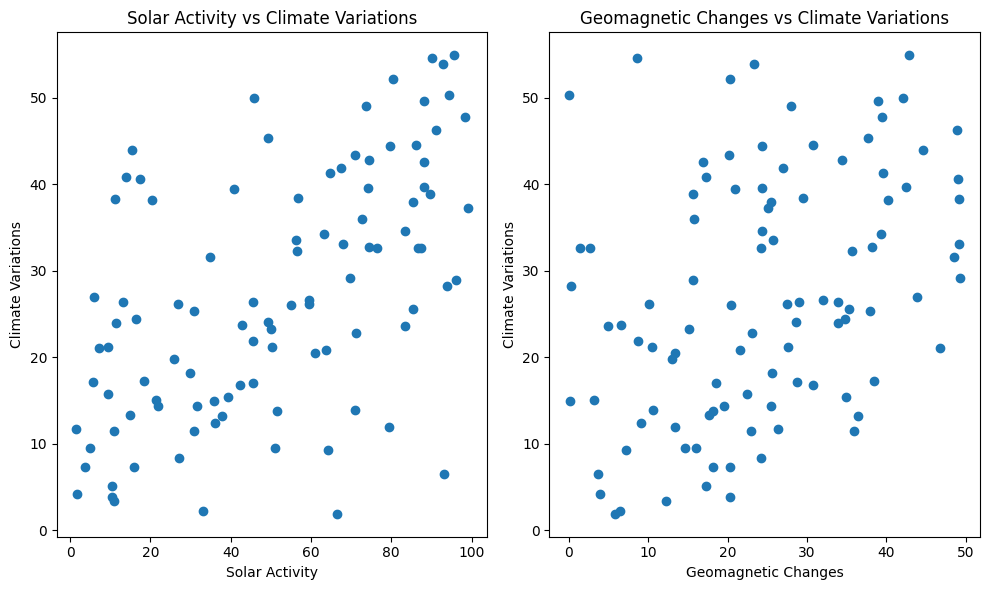

In [ ]:
# Simulated data for solar activity, geomagnetic field changes, and climate variations
np.random.seed(44)

# Simulated data for solar activity and geomagnetic field changes (features)
solar_activity = np.random.rand(100) * 100
geomagnetic_changes = np.random.rand(100) * 50

# Simulated data for climate variations (target)
climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(100) * 10

# Create a pandas DataFrame with the simulated data
data = pd.DataFrame({
    'Solar_Activity': solar_activity,
    'Geomagnetic_Changes': geomagnetic_changes,
    'Climate_Variations': climate_variations
})

# Print the pivot table of the data
pivot_table = pd.pivot_table(data, values='Climate_Variations', index='Solar_Activity', columns='Geomagnetic_Changes')
print("Pivot Table:")
print(pivot_table)

# Visualize the data
fig = plt.figure(figsize=(10, 6))

# Scatter plot for Solar Activity vs Climate Variations
plt.subplot(1, 2, 1)
plt.scatter(data['Solar_Activity'], data['Climate_Variations'])
plt.xlabel('Solar Activity')
plt.ylabel('Climate Variations')
plt.title('Solar Activity vs Climate Variations')

# Scatter plot for Geomagnetic Changes vs Climate Variations
plt.subplot(1, 2, 2)
plt.scatter(data['Geomagnetic_Changes'], data['Climate_Variations'])
plt.xlabel('Geomagnetic Changes')
plt.ylabel('Climate Variations')
plt.title('Geomagnetic Changes vs Climate Variations')

plt.tight_layout()
plt.show()


# Data Visualization

Pivot Table:
Geomagnetic Changes  0.018189   0.127062   0.294153   1.427233   2.645881   \
Solar Activity                                                               
1.585780                   NaN        NaN        NaN        NaN        NaN   
1.825511                   NaN        NaN        NaN        NaN        NaN   
3.768029                   NaN        NaN        NaN        NaN        NaN   
4.845415                   NaN        NaN        NaN        NaN        NaN   
5.755526                   NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
94.335072            50.351197        NaN        NaN        NaN        NaN   
95.747207                  NaN        NaN        NaN        NaN        NaN   
96.052623                  NaN        NaN        NaN        NaN        NaN   
98.428403                  NaN        NaN        NaN        NaN        NaN   
99.082268                  NaN        NaN        Na

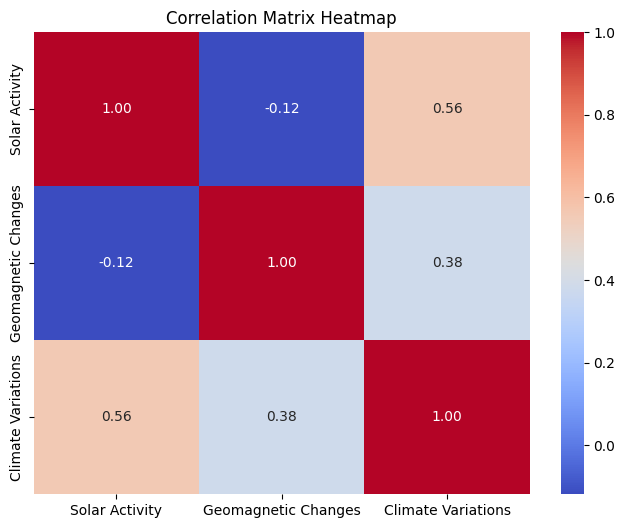

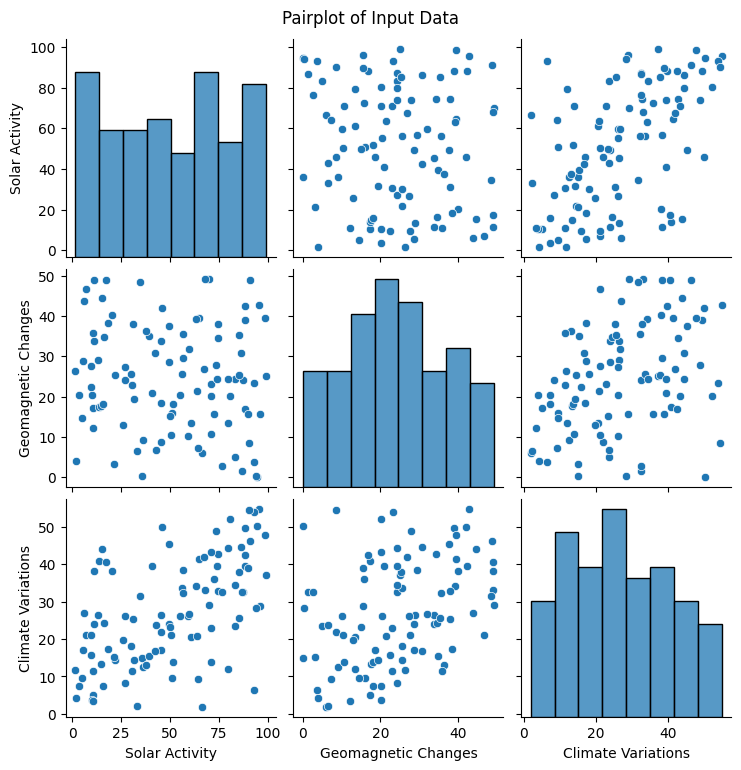

In [ ]:
from ctypes import pointer
# Simulated data for solar activity, geomagnetic field changes, and climate variations
np.random.seed(44)

# Simulated data for solar activity and geomagnetic field changes (features)
solar_activity = np.random.rand(100) * 100
geomagnetic_changes = np.random.rand(100) * 50

# Simulated data for climate variations (target)
climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(100) * 10

# Create a DataFrame from the data
data = pd.DataFrame({
    'Solar Activity': solar_activity,
    'Geomagnetic Changes': geomagnetic_changes,
    'Climate Variations': climate_variations
})

# Print the pivot table of the data
pivot_table = pd.pivot_table(data, index='Solar Activity', columns='Geomagnetic Changes', values='Climate Variations')
print("Pivot Table:")
print(pivot_table)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the input data using pairplot
sns.pairplot(data)
plt.suptitle('Pairplot of Input Data', y=1.02)
plt.show()

<ipython-input-38-702b4f2e061f>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


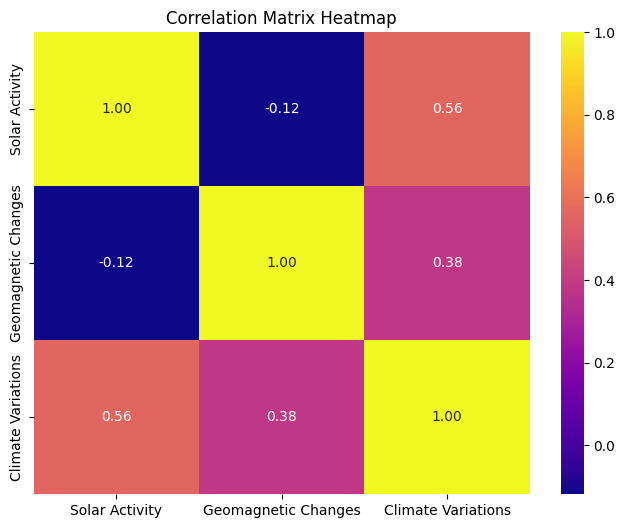

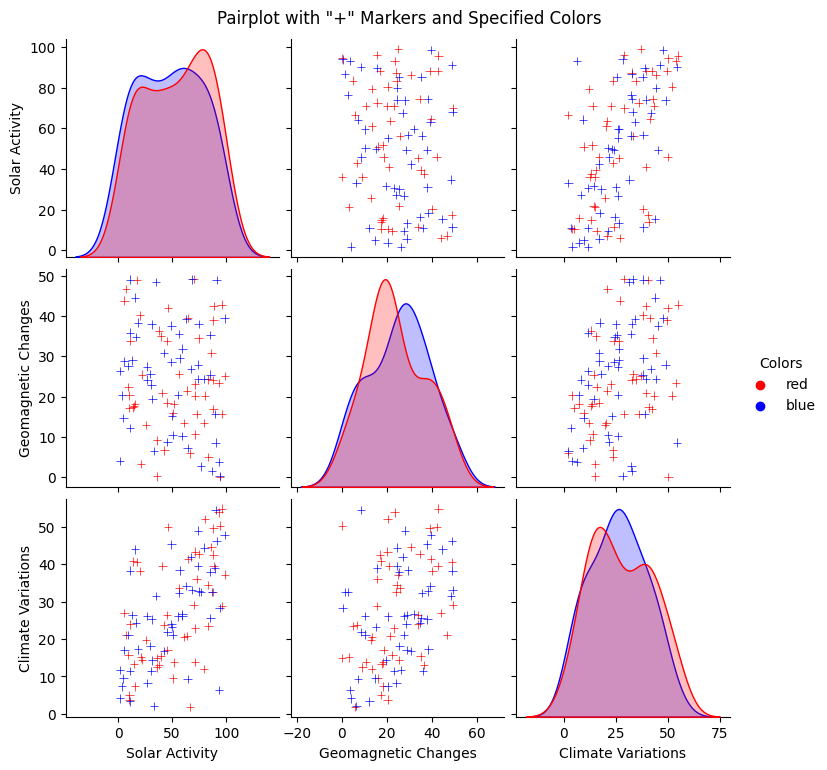

In [ ]:
# 100 YEARS

# Simulated data for a handered years solar activity and geomagnetic field changes (features)
solar_activity = np.random.rand(100) * 100
geomagnetic_changes = np.random.rand(100) * 50

# Simulated data for climate variations (target)
climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(100) * 10

# Dummy categorical variable for color assignment
colors = ['red'] * 50 + ['blue'] * 50


# Create a DataFrame from the data
data = pd.DataFrame({
    'Solar Activity': solar_activity,
    'Geomagnetic Changes': geomagnetic_changes,
    'Climate Variations': climate_variations,
    'Colors': colors  # Add the colors as a categorical variable
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the input data using pairplot
pairplot = sns.pairplot(data, markers='+', hue='Colors', palette={'red': 'red', 'blue': 'blue'}, diag_kind='kde', height=2.5)
plt.suptitle('Pairplot with "+" Markers and Specified Colors', y=1.02)
plt.show()


<ipython-input-39-322e94cd9698>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


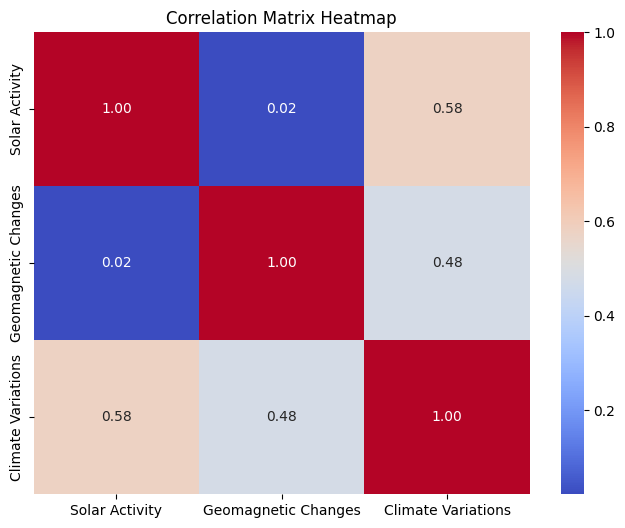

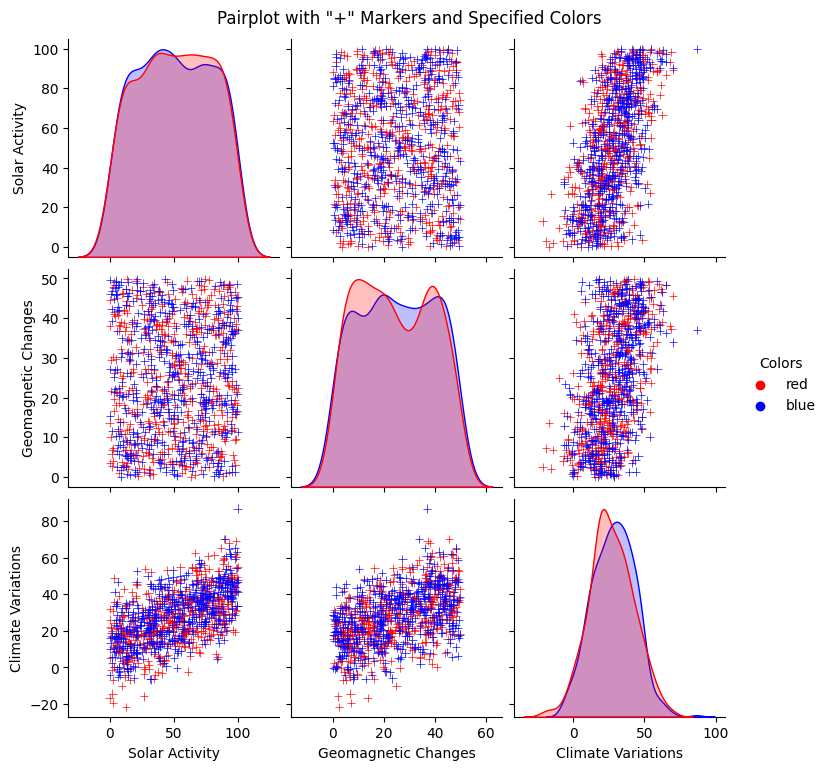

In [ ]:
# 1000 YEARS
# Simulated data for solar activity and geomagnetic field changes (features)
solar_activity = np.random.rand(1000) * 100
geomagnetic_changes = np.random.rand(1000) * 50

# Simulated data for climate variations (target)
climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(1000) * 10

# Dummy categorical variable for color assignment
colors = ['red'] * 500 + ['blue'] * 500

# Create a DataFrame from the data
data = pd.DataFrame({
    'Solar Activity': solar_activity,
    'Geomagnetic Changes': geomagnetic_changes,
    'Climate Variations': climate_variations,
    'Colors': colors  # Add the colors as a categorical variable
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the input data using pairplot
pairplot = sns.pairplot(data, markers='+', hue='Colors', palette={'red': 'red', 'blue': 'blue'}, diag_kind='kde', height=2.5)
plt.suptitle('Pairplot with "+" Markers and Specified Colors', y=1.02)
plt.show()


In [ ]:
# Reshape the features for modeling
X = np.column_stack((solar_activity, geomagnetic_changes))
y = climate_variations

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Predict climate variations for future solar activity and geomagnetic field changes
future_solar_activity = np.random.rand(100) * 100
future_geomagnetic_changes = np.random.rand(100) * 50
future_data = np.column_stack((future_solar_activity, future_geomagnetic_changes))

future_predictions = model.predict(future_data)
print("Predicted climate variations for future data:")
print(future_predictions)


Mean Squared Error: 86.76750293414365
Predicted climate variations for future data:
[26.25833379 34.71615528 34.38330783 44.62505672 23.66704666 26.78003486
 25.94482879 36.85415343 34.467915   28.14420286 15.90519009 21.57406634
 14.38632973 46.66931013 23.01997092 45.34114735 23.54828539 30.46744754
 30.08233009 37.41289082 21.82456095 43.21762215  1.670284   33.03560948
 21.60992229 38.49808309 29.46537758 25.86982572 38.51505445 22.29543941
 43.72916896 23.93545706  9.29322731 28.70891353 31.88578935 23.22164409
 24.14164186 43.1822505  45.47555174 52.78912575 10.04953854 42.1709035
 13.62154276 40.93869447 40.84382763 29.66443052 32.89733407 13.82666549
 34.79798084 16.34501839 31.93633299  6.37509774 26.51971412 34.59017594
 29.66288455 20.62987715 26.85292324 22.90454978 41.83476561 20.10797439
 38.1219457  39.63978275 32.83868777 33.83378821 19.10697091 23.72347576
 27.89346344 18.16130992 12.24955944 19.68347866 31.78041177 23.91228449
  5.07452927 15.30836013 50.97922298 23.8

In [ ]:
print("=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==")

=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==


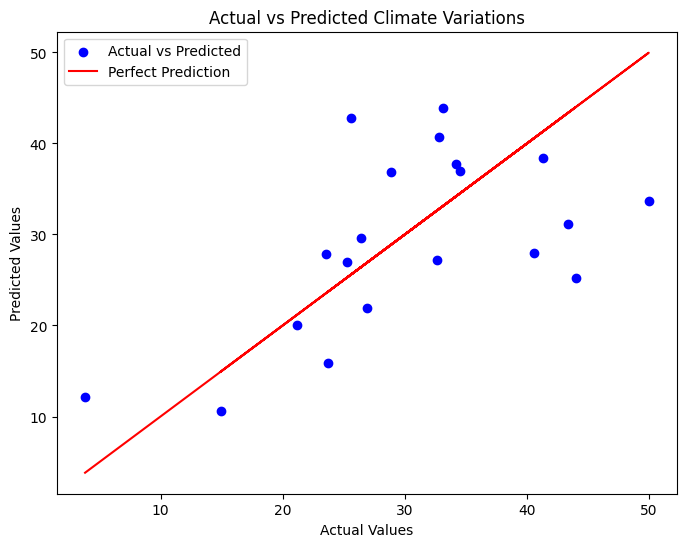

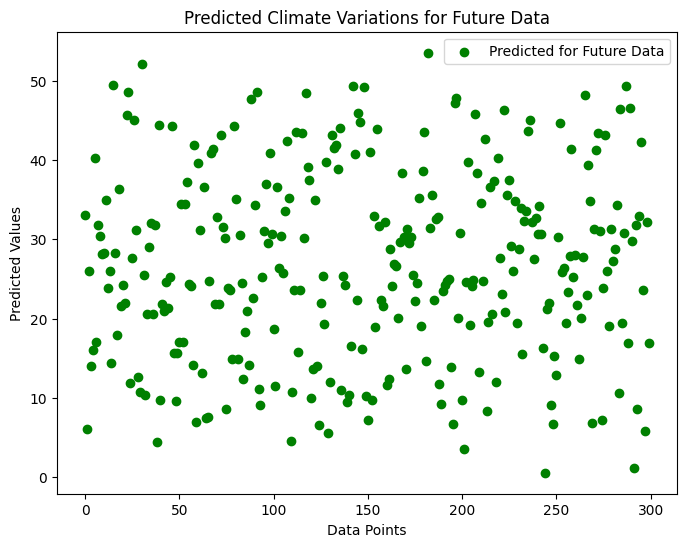

In [ ]:
# Actual vs predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # Plotting the perfect prediction line
plt.title('Actual vs Predicted Climate Variations')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Visualize the predicted values for future data
plt.figure(figsize=(8, 6))
plt.scatter(range(len(future_predictions)), future_predictions, color='green', label='Predicted for Future Data')
plt.title('Predicted Climate Variations for Future Data')
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


# ARIMA

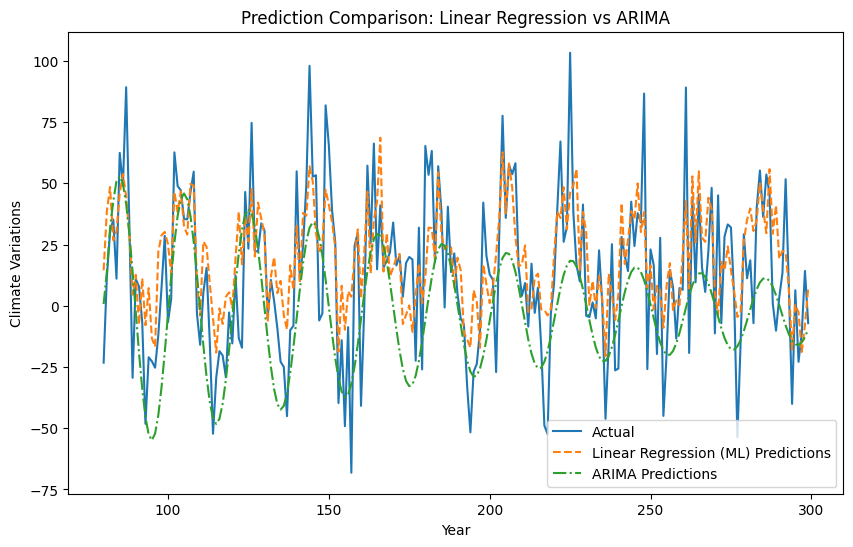

In [ ]:
years = np.arange(0, 300)
solar_activity = np.random.rand(300) * 100
geomagnetic_changes = (np.sin(np.pi * years / 10) * 50) + np.random.randn(300) * 10

# Simulated data for climate variations (target)
climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(300) * 20

# Create a DataFrame from the data
data = pd.DataFrame({
    'Year': years,
    'Solar Activity': solar_activity,
    'Geomagnetic Changes': geomagnetic_changes,
    'Climate Variations': climate_variations
})

# Splitting the data into training and testing sets
train_size = 80
train = data[:train_size]
test = data[train_size:]

# Machine Learning Model (Linear Regression) for prediction
X_train = train[['Solar Activity', 'Geomagnetic Changes']]
y_train = train['Climate Variations']

model = LinearRegression()
model.fit(X_train, y_train)

# ARIMA Model for time series forecasting
time_series = data.set_index('Year')['Geomagnetic Changes']
model_arima = ARIMA(time_series, order=(3, 1, 2))
model_fit = model_arima.fit()

# Forecasting using ARIMA
forecast_steps = len(data) - train_size
forecast_arima = model_fit.forecast(steps=forecast_steps)

# Predictions using Linear Regression (Machine Learning)
X_test = test[['Solar Activity', 'Geomagnetic Changes']]
predictions_ml = model.predict(X_test)

# Plotting predictions from both models
plt.figure(figsize=(10, 6))
plt.plot(test['Year'], test['Climate Variations'], label='Actual')
plt.plot(test['Year'], predictions_ml, label='Linear Regression (ML) Predictions', linestyle='--')
plt.plot(test['Year'], forecast_arima, label='ARIMA Predictions', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('Climate Variations')
plt.title('Prediction Comparison: Linear Regression vs ARIMA')
plt.legend()
plt.show()


In [ ]:
# Create traces for each line in the plot
trace_actual = go.Scatter(x=test['Year'], y=test['Climate Variations'], mode='lines', name='Actual')
trace_ml = go.Scatter(x=test['Year'], y=predictions_ml, mode='lines', name='Linear Regression (ML) Predictions', line=dict(dash='dash'))
trace_arima = go.Scatter(x=test['Year'], y=forecast_arima, mode='lines', name='ARIMA Predictions', line=dict(dash='dashdot'))

layout = go.Layout(
    title='Prediction Comparison: Linear Regression vs ARIMA',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Climate Variations'),
    legend=dict(x=0.1, y=1.1)
)

fig = go.Figure(data=[trace_actual, trace_ml, trace_arima], layout=layout)
fig.show()


# LSTM

Epoch 1/100
31/31 [==============================] - 6s 15ms/step - loss: 0.0560
Epoch 2/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0333
Epoch 3/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0312
Epoch 4/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 5/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0286
Epoch 6/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0261
Epoch 7/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0230
Epoch 8/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0220
Epoch 9/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0218
Epoch 10/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0212
Epoch 11/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0216
Epoch 12/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0226
Epoch 13/100
31/31 [=====

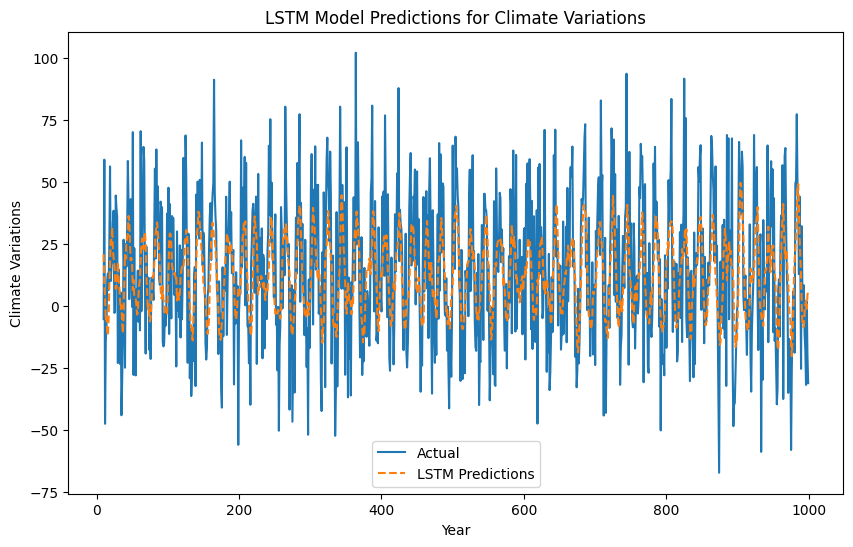

In [ ]:
years = np.arange(0, 1000)
solar_activity = np.random.rand(1000) * 100
geomagnetic_changes = (np.sin(np.pi * years / 10) * 50) + np.random.randn(1000) * 10

climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(1000) * 20

data = pd.DataFrame({
    'Year': years,
    'Solar Activity': solar_activity,
    'Geomagnetic Changes': geomagnetic_changes,
    'Climate Variations': climate_variations
})

target_variable = 'Climate Variations'
time_series_data = data[target_variable].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

X = X.reshape(X.shape[0], X.shape[1], 1)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)
predicted_values = model.predict(X)
predicted_values = scaler.inverse_transform(predicted_values)
plt.figure(figsize=(10, 6))
plt.plot(data['Year'][time_steps:], data[target_variable][time_steps:], label='Actual')
plt.plot(data['Year'][time_steps:], predicted_values, label='LSTM Predictions', linestyle='--')
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.title('LSTM Model Predictions for Climate Variations')
plt.legend()
plt.show()


Epoch 1/100
3/3 [==============================] - 8s 23ms/step - loss: 0.2697
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1778
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1001
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0541
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0754
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0771
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0570
Epoch 8/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0536
Epoch 9/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0558
Epoch 10/100
3/3 [==============================] - 0s 60ms/step - loss: 0.0577
Epoch 11/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0562
Epoch 12/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0528
Epoch 13/100
3/3 [==============================]

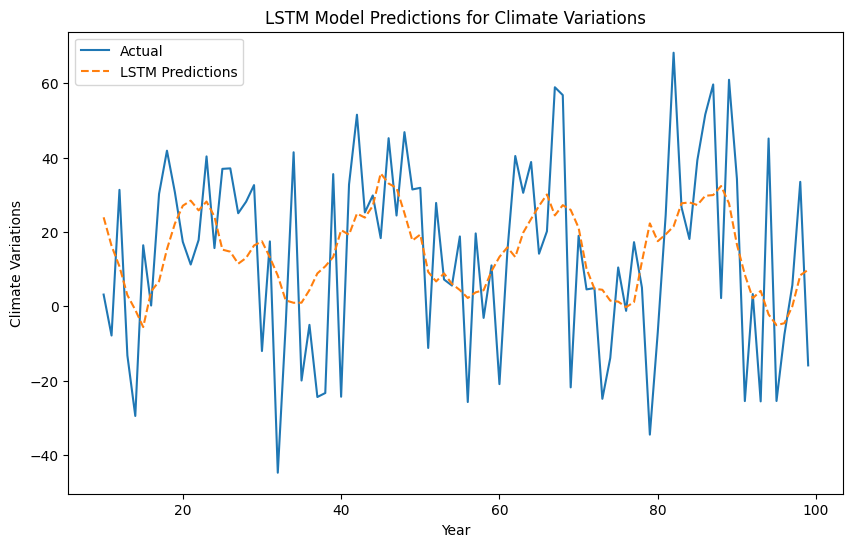

In [ ]:
years = np.arange(0, 100)
solar_activity = np.random.rand(100) * 100
geomagnetic_changes = (np.sin(np.pi * years / 10) * 50) + np.random.randn(100) * 10

# Simulated data for climate variations (target)
climate_variations = (solar_activity * 0.3) + (geomagnetic_changes * 0.5) + np.random.randn(100) * 20

# Create a DataFrame from the data
data = pd.DataFrame({
    'Year': years,
    'Solar Activity': solar_activity,
    'Geomagnetic Changes': geomagnetic_changes,
    'Climate Variations': climate_variations
})

# Select the target variable for modeling
target_variable = 'Climate Variations'
time_series_data = data[target_variable].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series_data)

# Prepare the data for LSTM model (time steps)
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10  # Define the number of time steps for LSTM
X, y = create_sequences(scaled_data, time_steps)

# Reshape input data for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Predict using the trained LSTM model
predicted_values = model.predict(X)

# Inverse transform the predicted values to original scale
predicted_values = scaler.inverse_transform(predicted_values)

# Plotting predictions from LSTM model against actual data
plt.figure(figsize=(10, 6))
plt.plot(data['Year'][time_steps:], data[target_variable][time_steps:], label='Actual')
plt.plot(data['Year'][time_steps:], predicted_values, label='LSTM Predictions', linestyle='--')
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.title('LSTM Model Predictions for Climate Variations')
plt.legend()
plt.show()
